In [1]:
import pandas as pd
import numpy as np

In [2]:
fn = pd.read_csv('fake_news.csv')
fn.head()

,title,text,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",TRUE


In [3]:
fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44890 entries, 0 to 44889
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44882 non-null  object
 1   text      44882 non-null  object
 2   date      44880 non-null  object
 3   category  44880 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [4]:
fn.isna().sum()

title        8
text         8
date        10
category    10
dtype: int64

In [5]:
fn.dropna(subset=['title'], inplace=True)
fn.dropna(subset=['date'], inplace=True)          

In [6]:
fn.isna().sum()

title       0
text        0
date        0
category    0
dtype: int64

In [7]:
duplicate = fn['title'].duplicated()
print(duplicate)

0        False
1        False
2        False
3        False
4        False
         ...  
44885     True
44886     True
44887     True
44888     True
44889     True
Name: title, Length: 44880, dtype: bool


In [8]:
fn = fn.drop_duplicates(subset=['title'], keep='first')
print(fn)

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44115  The White House and The Theatrics of ‘Gun Cont...   
44116  Activists or Terrorists? How Media Controls an...   
44117  BOILER ROOM – No Surrender, No Retreat, Heads ...   
44118  Federal Showdown Looms in Oregon After BLM Abu...   
44119  A Troubled King: Chicago’s Rahm Emanuel Desper...   

                                                    text                date  \
0      WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1      WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2      WASHINGTON (Reuters) - The speci

In [9]:
duplicate = fn['title'].duplicated()
print("Duplicated rows:",duplicate.sum())
print(duplicate)

Duplicated rows: 0
0        False
1        False
2        False
3        False
4        False
         ...  
44115    False
44116    False
44117    False
44118    False
44119    False
Name: title, Length: 38720, dtype: bool


In [10]:
fn.shape

(38720, 4)

In [11]:
fn.head()

,title,text,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",TRUE


In [12]:
fn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38720 entries, 0 to 44119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     38720 non-null  object
 1   text      38720 non-null  object
 2   date      38720 non-null  object
 3   category  38720 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [13]:
fn.to_csv('cleaned_data.csv',index=False)
print("Cleaned data is saved as cleaned_data.csv")

Cleaned data is saved as cleaned_data.csv


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
fn['category'].unique()

array(['TRUE', 'FAKE'], dtype=object)

In [35]:
fn['category'].value_counts()

category
TRUE    20826
FAKE    17894
Name: count, dtype: int64

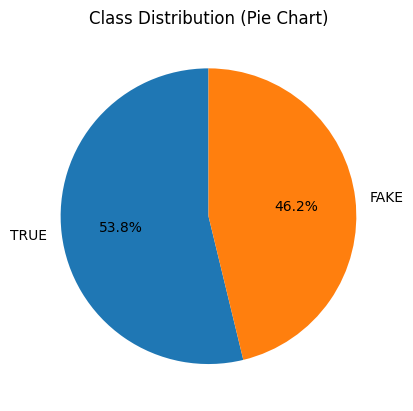

In [37]:
class_counts = fn['category'].value_counts()

# Plot Pie Chart for Balance Check
# plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution (Pie Chart)')
plt.show()

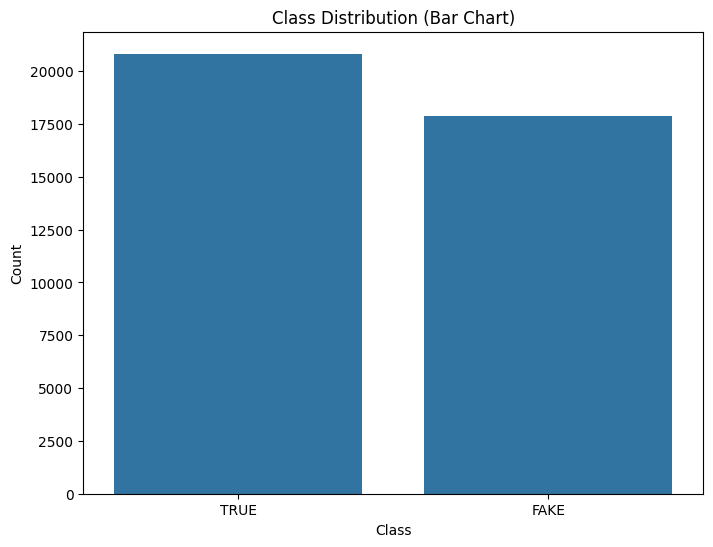

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution (Bar Chart)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()